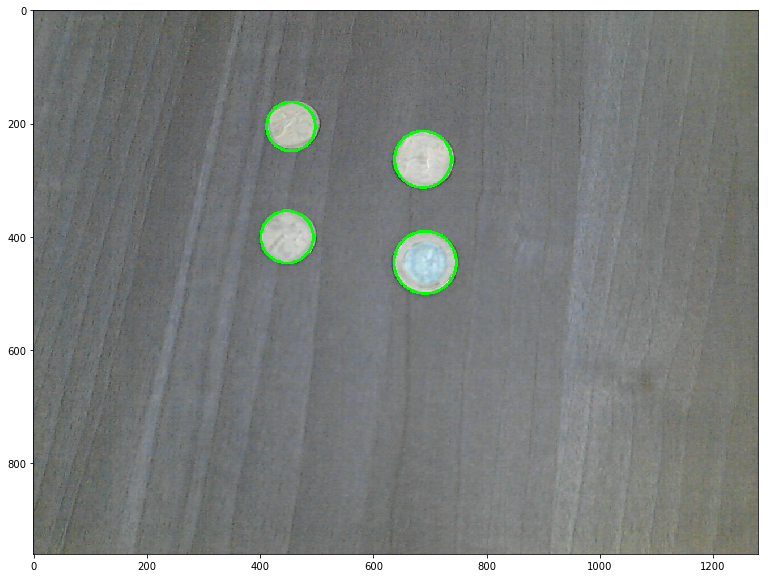

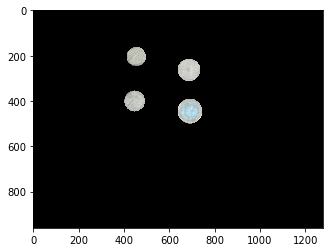

In [58]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
# load the image, clone it for output, and then convert it to grayscale

image  =  cv2.imread('Validation/t12.jpg')
iim=image.copy()

output = image.copy()
gray   = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.5, 80)
 
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    
    p       = []
    
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        if r<70:
            #print (x,y,r)
           
            p.append([x,y,r])

            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            #cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
 
    # show the output image
    
    imlst = [image, output]
    
    plt.figure(figsize=(25,10))
    plt.bone()
    import scipy.misc
    scipy.misc.imsave('Hough 2.jpg',output )
    plt.imshow(output)
    plt.show()

# Then to make masks :

mask_coordinate_array = np.array(p)
im = image.copy()
height,width,depth = im.shape
circle_img = np.zeros((height,width), np.uint8)

for i in range(len(mask_coordinate_array)):

    x = mask_coordinate_array[i][0]
    y = mask_coordinate_array[i][1]
    r = mask_coordinate_array[i][2]

    cv2.circle(circle_img,(x,y),r,1,thickness=-1)


masked_data = cv2.bitwise_and(im, im, mask=circle_img)

#plt.figure(figsize=(25,16)
plt.imshow(masked_data)
plt.show()           
        

In [54]:
import scipy.misc
scipy.misc.imsave('outfile10.jpg',out )

NameError: name 'out' is not defined

In [59]:
import scipy.misc
scipy.misc.imsave('outfile10.jpg',masked_data )

In [60]:

def colours(iim,x,y,rr):
    
    b=iim[int(y), int(x),2]
    g=iim[int(y), int(x),1]
    r=iim[int(y), int(x),0]

    sum_ =r+b+g
    
    #R1 and 20c
    if rr > 33 and rr <42:
        if sum_ > 385 and sum_ <494:
            return 1.0 ,"R1"
        else:
            return 0.2 ,"20c"
    
    # R2 and 50c
    if rr>41 and rr<50:
        if sum_ >385 and sum_ <494:
        
            return 2.0 ,"R2"
        
        elif sum_ < 650 and sum_>495:
            
            return 0.5 ,"50c"
        else:
            return 2.0 ,"R2"
    # R5
    elif rr >49:
         
            return 5.0 ,"R5"
    
    else: 
        return 0.1 ,"10c"
    
        

In [62]:
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import cv2
 

# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread('outfile10.jpg')
shifted = cv2.GaussianBlur(image,(15,15),0)

# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.threshold(gray_blur, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

import numpy as np
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

# loop over the unique labels returned by the Watershed
# algorithm
value_ = 0.0
counter = 0
for label in np.unique(labels):
    
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
 
    # otherwise, allocate memory for the label region and draw it on the mask
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
 
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
 
    # draw a circle enclosing the object
    ((x, y), r) = cv2.minEnclosingCircle(c)
    if int(r)>27 and int(r)<65:
        counter=counter +1
        cv2.circle(iim, (int(x), int(y)), int(r), (0, 255, 0), 2)
        val,ans=colours(iim,int(x), int(y),int(r))
        value_=value_+ round(val,1)
        #cv2.putText(iim, "", (int(x) - 10, int(y)),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0),1,cv2.LINE_AA)
 
        cv2.putText(iim, "{}".format(ans), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0),1,cv2.LINE_AA)
 
# show the output image
cv2.imwrite('watershed.png',iim)
cv2.imshow("Sum{}".format(round(value_,1)), iim)
cv2.waitKey(0)
cv2.destroyAllWindows()

[INFO] 4 unique segments found


C:\Users\amyse\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
